<a href="https://colab.research.google.com/github/Swayamprakashpatel/PU_DL/blob/main/Powderblend_DeepLearning_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.applications.imagenet_utils import decode_predictions

In [4]:
%%capture
#Training Folder Download
def folder_download(folder_id):
  # authenticate
  from google.colab import auth
  auth.authenticate_user()
  # get folder_name
  from googleapiclient.discovery import build
  service = build('drive', 'v3')
  folder_name = service.files().get(fileId=folder_id).execute()['name']
  # import library and download
  !wget -qnc https://github.com/segnolin/google-drive-folder-downloader/raw/master/download.py
  from download import download_folder
  download_folder(service, folder_id, '/content/sample_data/', folder_name)
  return folder_name
folder_download('1BRElRurkgrVxGgeQI-g0uYe_YN5HBTpn')

#Validation Folder Download
def folder_download(folder_id):
  # authenticate
  from google.colab import auth
  auth.authenticate_user()
  # get folder_name
  from googleapiclient.discovery import build
  service = build('drive', 'v3')
  folder_name = service.files().get(fileId=folder_id).execute()['name']
  # import library and download
  !wget -qnc https://github.com/segnolin/google-drive-folder-downloader/raw/master/download.py
  from download import download_folder
  download_folder(service, folder_id, '/content/sample_data/', folder_name)
  return folder_name
folder_download('1SBvBZBWQuWJ6Ks-eXZOWHx_4p4D0vuqX')

Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fappengine.admin+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcompute+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&state=2HIJQeJMQ4PXbwm8AOvZvyApRbZ3sJ&prompt=consent&access_type=offline&code_challenge=PwzOLoqHKJMAPgKEmfNWMREhRV3MkXMEpKrKSYVXl_Y&code_challenge_method=S256

Enter verification code: 4/1AX4XfWjJvSGPWFMVt3-EyrshpXicJzhUvTLJGCHVBqj5CfJ5bxYgkx48UpM


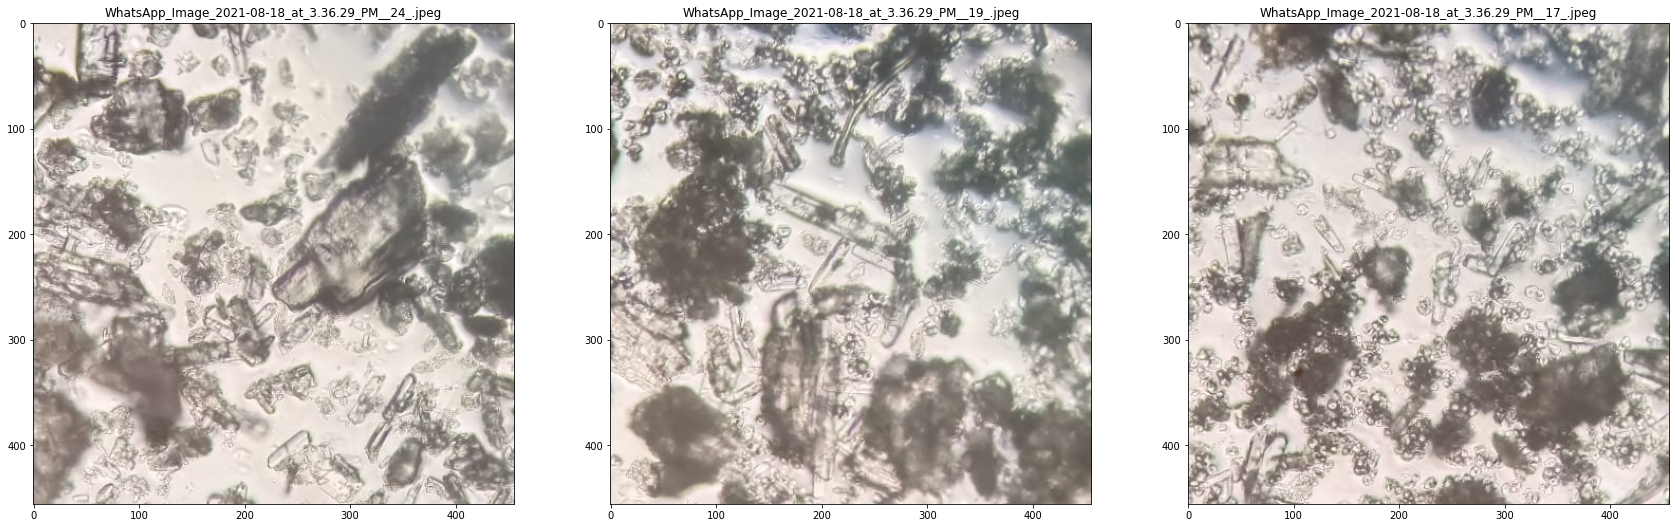

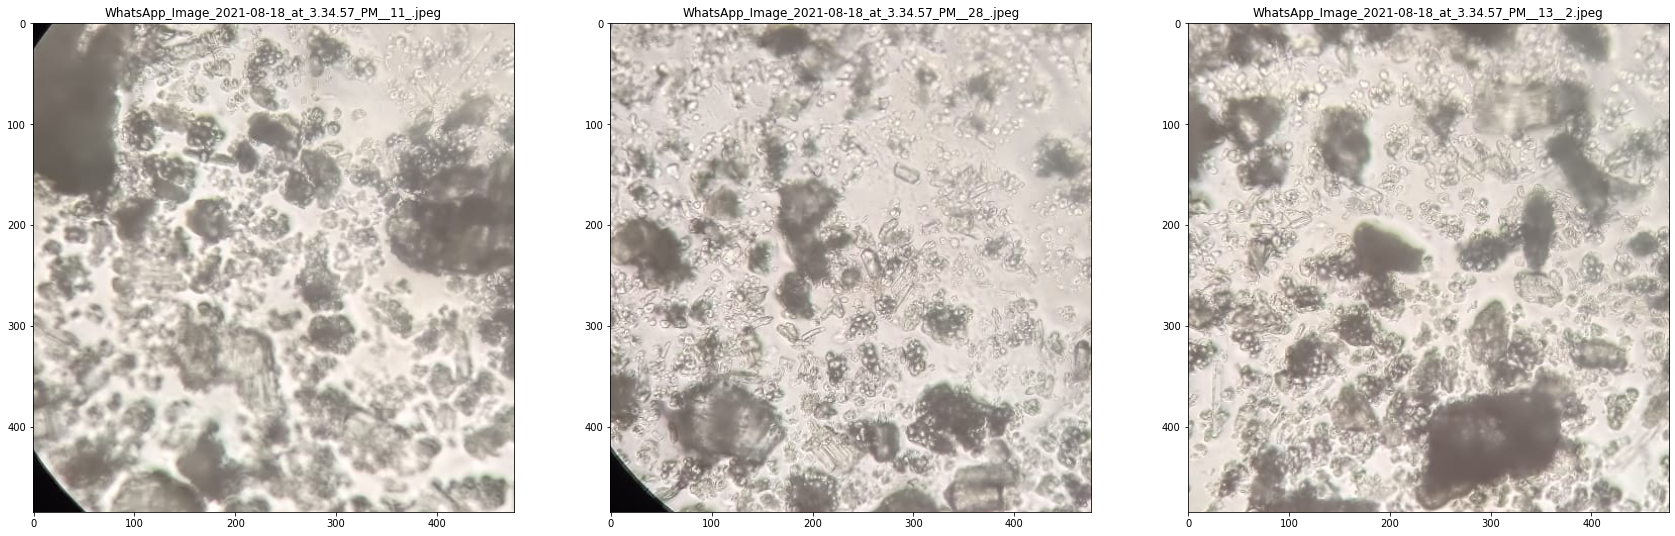

In [5]:
#Set Batch Size and Image Height and Image Width
batch_size = 10
IMG_HEIGHT, IMG_WIDTH = (50,50)


# Show image after Size Setting (Reduction)

# Images of Not Mixed Powder Samples
plt.figure(figsize=(IMG_HEIGHT,IMG_WIDTH))
img_folder=r'/content/sample_data/Training/NOT MIXED'
for i in range(3):
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path,cv2.COLOR_RGB2BGR)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

# Images of Mixed Powder Samples
plt.figure(figsize=(IMG_HEIGHT,IMG_WIDTH))
img_folder=r'/content/sample_data/Training/MIXED'
for i in range(3):
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path,cv2.COLOR_RGB2BGR)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [6]:
#Directories with Subdirectories as Classes for training and validation datasets

train_dir = '/content/sample_data/Training'
validation_dir = '/content/sample_data/Validation'

In [7]:
#Image to Data Transform using ImageDataGenerator of Keras

#Image to Data for Training Data
Dataset_Image_Training = ImageDataGenerator(rescale = 1./255, zoom_range=[0.8, 1.5], brightness_range= [0.8, 2.0])
train_data_gen =  Dataset_Image_Training.flow_from_directory(
                    batch_size= batch_size,
                    directory=train_dir,
                    shuffle=True,
                    target_size=(IMG_HEIGHT,IMG_WIDTH),
                    class_mode='binary',
                    )
#Image to Data for Validation Data
validation_image_generator = ImageDataGenerator(rescale=1./255)
val_data_gen = validation_image_generator.flow_from_directory(
                 batch_size=batch_size,
                 directory= validation_dir,
                 shuffle=True,
                 target_size=(IMG_HEIGHT,IMG_WIDTH),
                 class_mode= 'binary')
#Check Classes in Dataset
train_data_gen.class_indices

Found 142 images belonging to 2 classes.
Found 12 images belonging to 2 classes.


{'MIXED': 0, 'NOT MIXED': 1}

In [ ]:
#Deep Learning CNN Model with Keras Seqential

model = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPool2D(2,2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPool2D(2,2),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    MaxPool2D(2,2),
    Conv2D(256, (3,3), padding='same', activation='relu'),
    MaxPool2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')])

# Model Compilation
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#Tensorboard Set up
import tensorflow as tf
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

#Checkpoint and earlystop setting
filepath = '/content/drive/My Drive/DL_Model.hdf5'
checkpoint = [tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', mode='max', save_best_only=True, Save_weights_only = False, verbose = 1), 
              tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=25, verbose =1), [tensorboard_callback]]

#Model Fitting
hist = model.fit(
    train_data_gen,
    steps_per_epoch=None,
    epochs=500,
    validation_data=val_data_gen,
    validation_steps=None,
    callbacks = [checkpoint],
)

#Accuracy Print

train_acc = max(hist.history['accuracy'])
val_acc = max(hist.history['val_accuracy'])
train_loss = min(hist.history['loss'])
val_loss = min(hist.history['val_loss'])
print('Training accuracy is')
print(train_acc)
print('Validation accuracy is')
print(val_acc)
print('Training loss is')
print(train_loss)
print('Validation loss is')
print(val_loss)

#Load Tensorboard
%load_ext tensorboard
%tensorboard --logdir logs

In [ ]:
#Predictionn

Pred_Dir = '/content/drive/MyDrive/Model_DE/Test'
Prediction = ImageDataGenerator(rescale = 1./255)
Pred_Data =  Prediction.flow_from_directory(
                    directory=Pred_Dir,
                    batch_size= batch_size,
                    shuffle=False,
                    target_size=(IMG_HEIGHT,IMG_WIDTH),
                    class_mode=None)
#Pred_Data.reset()

Prediction = np.round(model.predict(Pred_Data))
k = print(Prediction)
train_data_gen.class_indices